In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplt
from sklearn.ensemble import RandomForestClassifier as RC
from sklearn.model_selection import cross_val_score 

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head(n=7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

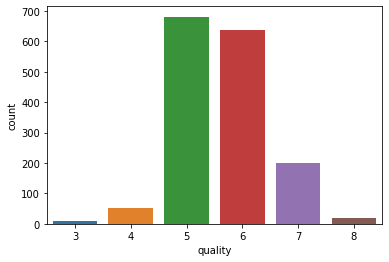

In [10]:
sns.countplot(x='quality',data=df)

In [15]:
#df.drop(["qwee"], axis = 1, inplace = True)

KeyError: "['qwee'] not found in axis"

In [16]:
conditions = [
    (df["quality"]>=7),
    (df["quality"]<=4)
]
rating = ["superb","poor"]
df["rating"] = np.select(conditions,rating,default="fine")

In [17]:
df.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,fine
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,fine
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,superb
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,superb
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,fine


In [18]:
df.groupby("rating").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
poor,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
superb,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


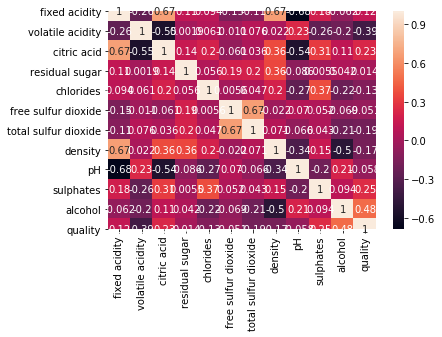

In [20]:
correlation = df.corr()
sns.heatmap(correlation,annot=True)

In [21]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split 

x = df[df.columns[:-1]] 
y = df[df.columns[-1]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred = knn.predict(x_test) 

In [25]:
from sklearn import metrics
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))


kNN model accuracy: 0.871875


<h3>k fold cross validation scores<h3> 

In [27]:
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x,y,cv=3)

array([0.92682927, 0.9587242 , 0.96435272])

In [29]:
cross_val_score(KNeighborsClassifier(), x,y,cv=3)

array([0.8424015 , 0.8424015 , 0.84615385])

In [30]:
scores1 = cross_val_score(RC(n_estimators=2),x,y, cv=5)
np.average(scores1)

0.945585815047022

In [31]:
scores2 = cross_val_score(RC(n_estimators=3),x,y, cv=10)
np.average(scores2)

0.9799606918238994

In [32]:
scores3 = cross_val_score(RC(n_estimators=4),x,y, cv=10)
np.average(scores3)

0.9787382075471699

<h2>Finding best model and Hyperparameter tuning using gridsearchCV and RandomizedSearchCV<h4>

In [33]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(x, y)
clf.cv_results_

{'mean_fit_time': array([0.05832267, 0.02073393, 0.06087661, 0.02186999, 0.05966096,
        0.01982727]),
 'std_fit_time': array([0.00668917, 0.00313955, 0.00703093, 0.00765242, 0.00922017,
        0.00678019]),
 'mean_score_time': array([0.00895214, 0.00079908, 0.00652981, 0.00312414, 0.00911913,
        0.00395694]),
 'std_score_time': array([0.00157862, 0.00159817, 0.00800969, 0.00624828, 0.0054562 ,
        0.00605013]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [35]:
dfr = pd.DataFrame(clf.cv_results_)
dfr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058323,0.006689,0.008952,0.001579,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.853125,0.88750,0.903125,0.875000,0.865204,0.876791,0.017353,6
1,0.020734,0.003140,0.000799,0.001598,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.060877,0.007031,0.006530,0.008010,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.875000,0.89375,0.928125,0.928125,0.902821,0.905564,0.020490,4
3,0.021870,0.007652,0.003124,0.006248,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,0.059661,0.009220,0.009119,0.005456,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.875000,0.89375,0.928125,0.928125,0.902821,0.905564,0.020490,4
5,0.019827,0.006780,0.003957,0.006050,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [37]:
dfr[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.876791
1,1,linear,1.000000
2,10,rbf,0.905564
3,10,linear,1.000000
4,20,rbf,0.905564
5,20,linear,1.000000


In [38]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [39]:
clf.best_score_

1.0

In [40]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(x,y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.905564
1,1,rbf,0.876791
